Описание в: 'doc/w2_05_statement_neighbours.pdf'

    -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def save_answer(name, value):
    with open('data/statement_neighbours_' + name + '.txt', 'w', encoding='utf-8') as f:
        f.write(value)

In [3]:
df = pd.read_csv('data/wine.data', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [6]:
cv = KFold(5, shuffle = True, random_state = 42)

In [7]:
accuracy_list = []
for k in range(1, 51):
    score = cross_val_score(KNeighborsClassifier(k), df[list(range(1,14))], df[0], cv=cv).mean()
    accuracy_list.append(score)

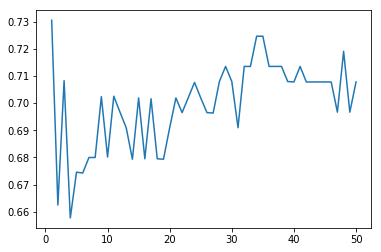

In [8]:
plt.plot(list(range(1, 51)), accuracy_list)

In [9]:
answer = max([(value, k) for k, value in zip(range(1, 51), accuracy_list)])[1]
save_answer('1', str(answer))

answer

1

In [10]:
answer = round(max([(value, k) for k, value in zip(range(1, 51), accuracy_list)])[0], 2)
save_answer('2', str(answer))

answer

0.72999999999999998

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
X = scale(df[list(range(1,14))])
y = df[0]

In [13]:
accuracy_list = []
for k in range(1, 51):
    score = cross_val_score(KNeighborsClassifier(k), X, y, cv=cv).mean()
    accuracy_list.append(score)

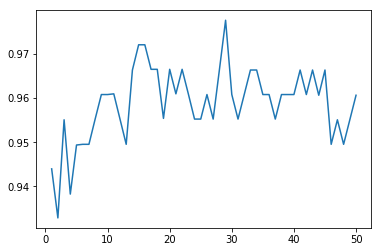

In [14]:
plt.plot(list(range(1, 51)), accuracy_list)

In [15]:
answer = max([(value, k) for k, value in zip(range(1, 51), accuracy_list)])[1]
save_answer('3', str(answer))

answer

29

In [16]:
answer = round(max([(value, k) for k, value in zip(range(1, 51), accuracy_list)])[0], 2)
save_answer('4', str(answer))

answer

0.97999999999999998